# BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.

## Business Use Case: 

### There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

## Project Description:

### Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

### You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.

## About The Dataset: 

### The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not.

# 1. Import Important Libraries 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

# 2. Load Dataset

In [74]:
train = pd.read_csv('/Users/sneha/Downloads/termdeposit_train.csv')
test = pd.read_csv('/Users/sneha/Downloads/termdeposit_test.csv')

# 3. Display head of train and test dataset 

In [3]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [4]:
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


# 4. Perform EDA

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [6]:
num_rows, num_columns = train.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 31647
Number of columns: 18


In [7]:
train.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
# 5. Checking for null and duplicates in both train and test dataset. 

In [8]:
train[train.duplicated()]

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed


In [9]:
train.isnull().any()

ID            False
age           False
job           False
marital       False
education     False
default       False
balance       False
housing       False
loan          False
contact       False
day           False
month         False
duration      False
campaign      False
pdays         False
previous      False
poutcome      False
subscribed    False
dtype: bool

In [10]:
test[test.duplicated()]

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome


In [11]:
test.isnull().any()

ID           False
age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
dtype: bool

In [ ]:
# 6. Selecting Integer datatype in train dataset to study integer columns. 

In [12]:
int_columns = train.select_dtypes(include='int')    
int_columns

,ID,age,balance,day,duration,campaign,pdays,previous
0,26110,56,1933,19,44,2,-1,0
1,40576,31,3,20,91,2,-1,0
2,15320,27,891,18,240,1,-1,0
3,43962,57,3287,22,867,1,84,3
4,29842,31,119,4,380,1,-1,0
...,...,...,...,...,...,...,...,...
31642,36483,29,0,12,116,2,-1,0
31643,40178,53,380,5,438,2,-1,0
31644,19710,32,312,7,37,3,-1,0
31645,38556,57,225,15,22,7,337,12


In [13]:
int_columns= int_columns.drop(columns="ID")

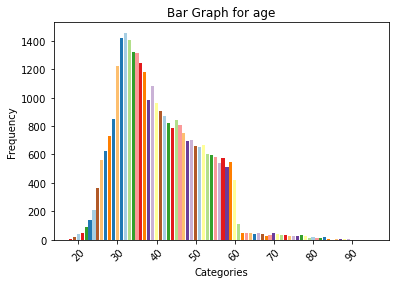

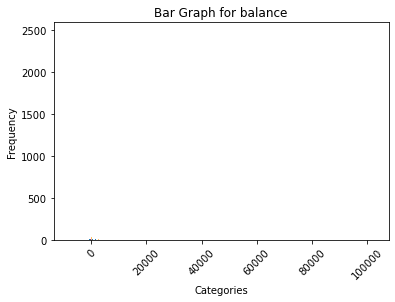

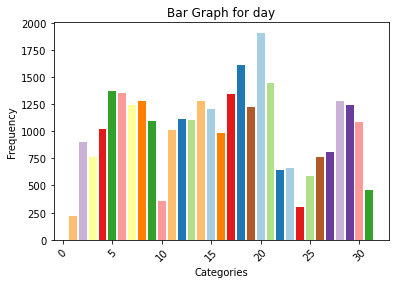

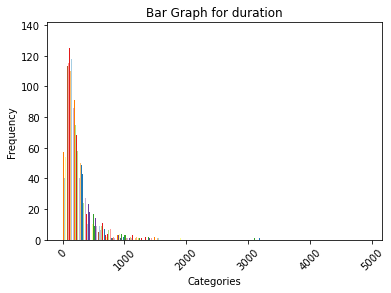

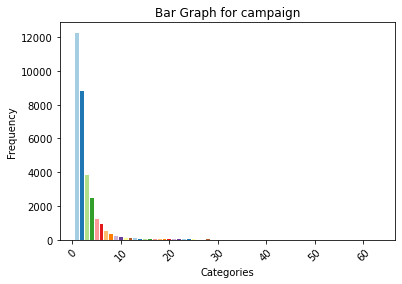

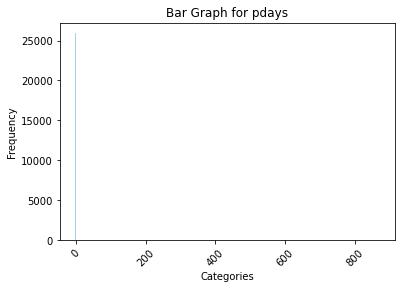

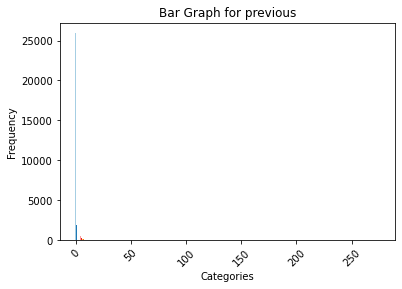

In [14]:
for col in int_columns[2:]:
    # Calculate the frequency of each category in the column
    value_counts = train[col].value_counts()
    
    # Create a bar graph for the current column
    plt.bar(value_counts.index, value_counts.values, color=plt.cm.Paired.colors)
    
    # Add labels and title
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.title(f'Bar Graph for {col}')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Show the plot
    plt.show()

In [15]:
for col in int_columns:
    print(col,'\n')
    # Calculate the frequency of each category in the column
    value_counts = train[col].value_counts()
    print(value_counts,'\n')

age 

32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64 

balance 

 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722        1
 2968        1
Name: balance, Length: 6326, dtype: int64 

day 

20    1909
18    1612
21    1445
5     1373
6     1348
17    1344
14    1283
8     1281
28    1276
29    1241
7     1240
19    1228
15    1208
12    1116
13    1099
9     1097
30    1082
4     1016
11    1014
16     981
2      900
27     804
3      761
26     761
23     657
22     640
25     586
31     460
10     360
24     305
1      220
Name: day, dtype: int64 

duration 

90      135
124     130
139     127
88      127
104     127
       ... 
1405      1
1090      1
1261      1
1218      1
1973      1
Name: duration, Length: 1454, dtype: int64 

campaign 

1     12262
2      8798
3      3858
4      2

# summary :

**Age:**
- The distribution of age varies from 32 to 90+.
- The most common ages are around 32, 31, 33, 34, and 35.

**Balance:**
- The account balance varies, including negative values.
- The most common balance values are 0, 1, 2, 4, and 3.

**Day:**
- The distribution of days shows the day of the month when the last contact was made.
- The most common days are around 20, 18, 21, 5, and 6.

**Duration:**
- The duration of the last contact in seconds varies.
- There's a wide range of values for the duration.
- The most common durations are around 90, 124, 139, 88, and 104 seconds.

**Campaign:**
- The number of contacts during this campaign.
- The most common number of contacts is 1, followed by 2 and 3.

**Pdays:**
- The number of days that passed since the last contact from a previous campaign.
- A value of -1 indicates that the individual was not previously contacted.
- The most common value is -1, indicating a large proportion of individuals were not contacted previously.

**Previous:**
- The number of contacts performed before this campaign.
- The most common value is 0, indicating that many individuals had no previous contacts.


## 6.1 since, ID is a unique value for every indvidual we can  drop this column.

In [75]:
train = train.drop(columns='ID')
test = test.drop(columns='ID')

## 6.2 Age Groups: categorize ages into different groups (e.g., young, middle-aged, senior) and create a new column based on these groups.

In [7]:
df = train

In [19]:
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 60, float('inf')], labels=['young', 'middle_aged', 'senior'])

# Balance Categories: Similar to age,create balance categories (e.g., low, medium, high) based on the account balance values.
df['balance_category'] = pd.cut(df['balance'], bins=[-float('inf'), 0, 1000, float('inf')], labels=['low', 'medium', 'high'])
# Contact Duration Categories: You can categorize contact duration (e.g., short, medium, long) based on the duration values.
df['contact_duration_category'] = pd.cut(df['duration'], 
                                         bins=[-float('inf'), 120, 300, float('inf')], 
                                         labels=['short', 'medium', 'long'])

# Interaction Features: Combine related columns to create interaction features. 

# create a binary column indicating whether the individual was previously contacted (pdays) 
# and a numeric column showing the number of previous contacts (previous).



df['previously_contacted'] = df['pdays'].apply(lambda x: 1 if x != -1 else 0)

df['loan_indicator'] = (df['housing'] == 'yes') | (df['loan'] == 'yes')

df['campaign_frequency'] = df['campaign'].apply(lambda x: 'high' if x > 3 else 'low')

df

KeyError: 'age'

In [21]:
# Define bin edges and labels for categorical binning
bin_edges = [0, 10, 20, 31]  # Example: Bins are 0-9, 10-19, 20-30
bin_labels = ['early', 'mid', 'late']

# Create a new categorical feature 'day_category' based on binning

df['day_category'] = pd.cut(df['day'], bins=bin_edges, labels=bin_labels)

# Drop the original 'day' column if needed
df.drop('day', axis=1, inplace=True)

In [9]:
## Dropping the above previous updated columns.

columns_to_drop = ['age', 'balance', 'duration', 'pdays', 'housing', 'loan', 'campaign']
df = df.drop(columns=columns_to_drop)

In [20]:
df

,job,marital,education,default,contact,day,month,previous,poutcome,subscribed,age_group,balance_category,contact_duration_category,previously_contacted,loan_indicator,campaign_frequency
0,admin.,married,unknown,no,telephone,19,nov,0,unknown,no,middle_aged,high,short,0,False,low
1,unknown,married,secondary,no,cellular,20,jul,0,unknown,no,middle_aged,medium,short,0,False,low
2,services,married,secondary,no,cellular,18,jul,0,unknown,no,young,medium,medium,0,True,low
3,management,divorced,tertiary,no,cellular,22,jun,3,success,yes,middle_aged,high,long,1,False,low
4,technician,married,secondary,no,cellular,4,feb,0,unknown,no,middle_aged,medium,long,0,True,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,management,single,tertiary,no,cellular,12,may,0,unknown,no,young,low,short,0,True,low
31643,management,divorced,tertiary,no,cellular,5,jun,0,unknown,yes,middle_aged,medium,long,0,True,low
31644,management,single,tertiary,no,cellular,7,aug,0,unknown,no,middle_aged,medium,short,0,False,low
31645,technician,married,secondary,no,telephone,15,may,12,failure,no,middle_aged,medium,short,1,True,high


# summary : 

Creating new columns relevant to the target column can involve feature engineering that helps improve the predictive power of your dataset for your target variable (in this case, the "subscribed" column). H

1. **age_groups:** categorize ages into different groups (e.g., young, middle-aged, senior) and create a new column based on these groups.

2. **Balance Categories:** Similar to age, balance categories (e.g., low, medium, high) based on the account balance values.

3. **Contact Duration Categories:** categorize contact duration (e.g., short, medium, long) based on the duration values.

4. **Interaction Features:** Combine related columns to create interaction features. create a binary column indicating whether the individual was previously contacted (`pdays`) and a numeric column showing the number of previous contacts (`previous`).

5. **Month Seasons:** Convert months into seasons (e.g., winter, spring, summer, fall) to capture potential seasonality in subscribing behavior.

6. **Campaign Outcome:** Create a new binary column based on the outcome of the previous campaign (`poutcome`). For example, if the previous outcome was successful, you can mark it as "previous_success."

  ^ 7. **Communication Channel:** create binary columns for each contact type (`contact`), indicating whether the contact was made through a particular communication channel.

 ^ 8. **Loan Indicator:** Combine information from the "housing" and "loan" columns to create an indicator of whether the person has any kind of loan.

^ 9. **Contact Frequency:** create a new column indicating the frequency of contacts within the same campaign (`campaign`).

^ 10. **Days to Contact:** calculate the difference between the current contact day (`day`) and the previous contact day (if applicable) to see if there's a pattern in contact timing.


# 7. Selecting Object datatype in train dataset to study object columns. 

In [21]:
obj_columns = train.select_dtypes(include='object')    
obj_columns

,job,marital,education,default,housing,loan,contact,month,poutcome,subscribed,campaign_frequency
0,admin.,married,unknown,no,no,no,telephone,nov,unknown,no,low
1,unknown,married,secondary,no,no,no,cellular,jul,unknown,no,low
2,services,married,secondary,no,yes,no,cellular,jul,unknown,no,low
3,management,divorced,tertiary,no,no,no,cellular,jun,success,yes,low
4,technician,married,secondary,no,yes,no,cellular,feb,unknown,no,low
...,...,...,...,...,...,...,...,...,...,...,...
31642,management,single,tertiary,no,yes,no,cellular,may,unknown,no,low
31643,management,divorced,tertiary,no,no,yes,cellular,jun,unknown,yes,low
31644,management,single,tertiary,no,no,no,cellular,aug,unknown,no,low
31645,technician,married,secondary,no,yes,no,telephone,may,failure,no,high


In [22]:
obj_columns.nunique()

job                   12
marital                3
education              4
default                2
housing                2
loan                   2
contact                3
month                 12
poutcome               4
subscribed             2
campaign_frequency     2
dtype: int64

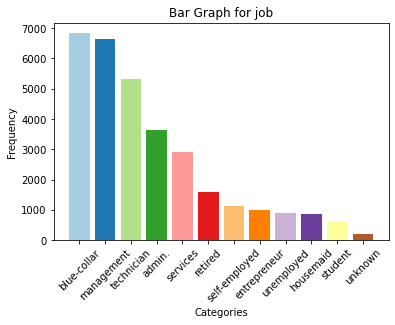

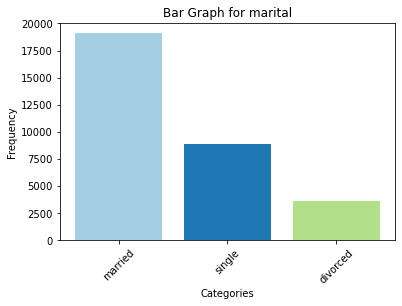

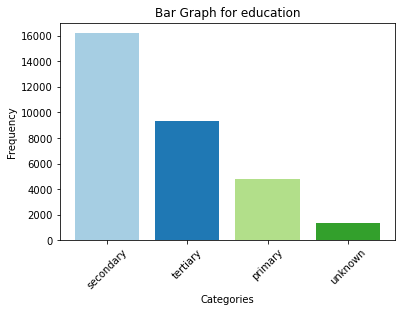

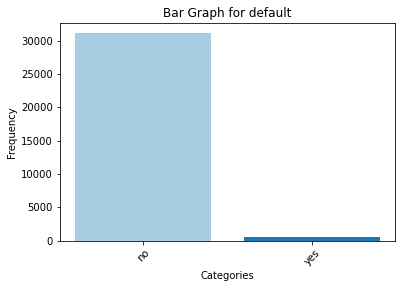

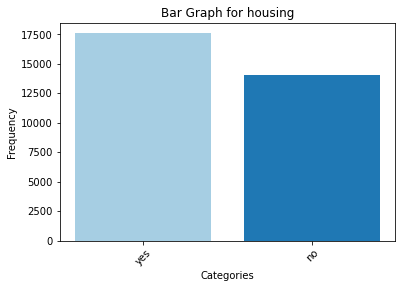

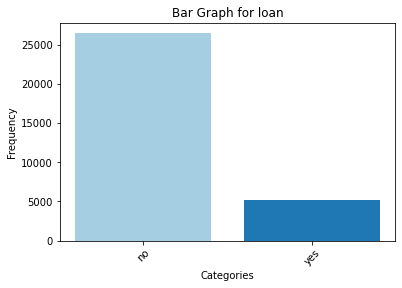

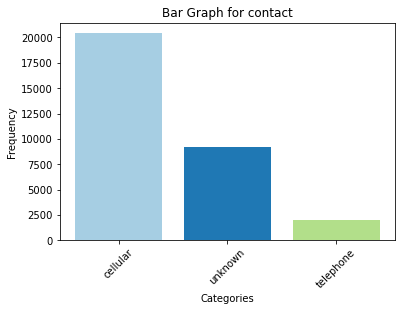

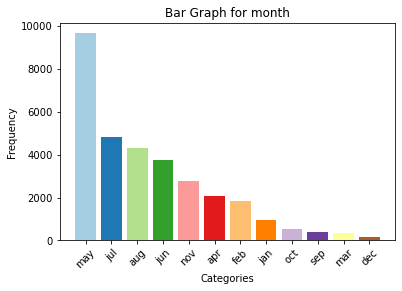

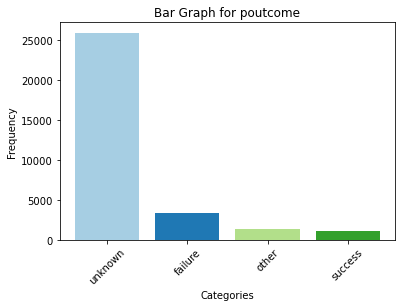

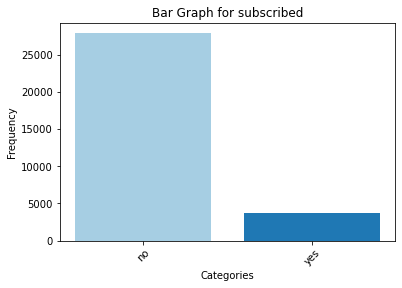

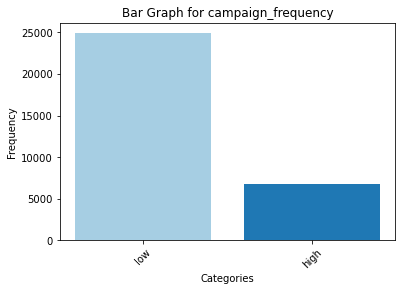

In [23]:
for col in obj_columns:
    # Calculate the frequency of each category in the column
    value_counts = train[col].value_counts()
    
    # Create a bar graph for the current column
    plt.bar(value_counts.index, value_counts.values, color=plt.cm.Paired.colors)
    
    # Add labels and title
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.title(f'Bar Graph for {col}')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Show the plot
    plt.show()

In [24]:
for col in obj_columns:
    print(col,'\n')
    # Calculate the frequency of each category in the column
    value_counts = train[col].value_counts()
    print(value_counts,'\n')

job 

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64 

marital 

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64 

education 

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64 

default 

no     31062
yes      585
Name: default, dtype: int64 

housing 

yes    17584
no     14063
Name: housing, dtype: int64 

loan 

no     26516
yes     5131
Name: loan, dtype: int64 

contact 

cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64 

month 

may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: month, dtype: int64 

poutcome 

unknown   


**Job:**
- The most common jobs include blue-collar, management, technician, admin., and services.
- There are also categories like retired, self-employed, entrepreneur, student, and unknown.

**Marital:**
- The most common marital status is married, followed by single and divorced.

**Education:**
- The education level is mostly secondary, followed by tertiary and primary.
- There's also a category for unknown education.

**Default:**
- Most individuals have no default (no), while a small number have credit in default (yes).

**Housing:**
- Most individuals have a housing loan (yes), while a smaller number do not have a housing loan (no).

**Loan:**
- Most individuals do not have a personal loan (no), while a smaller number have a personal loan (yes).

**Contact:**
- The most common contact type is cellular, followed by unknown and telephone.

**Month:**
- The most common contact months are May, July, August, June, and November.
- There are fewer contacts in months like December, March, and September.

**Poutcome:**
- The outcome of the previous marketing campaign is often unknown, followed by failure, other, and success.

**Subscribed:**
- Most individuals did not subscribe (no), while a smaller number subscribed to the product or service (yes).


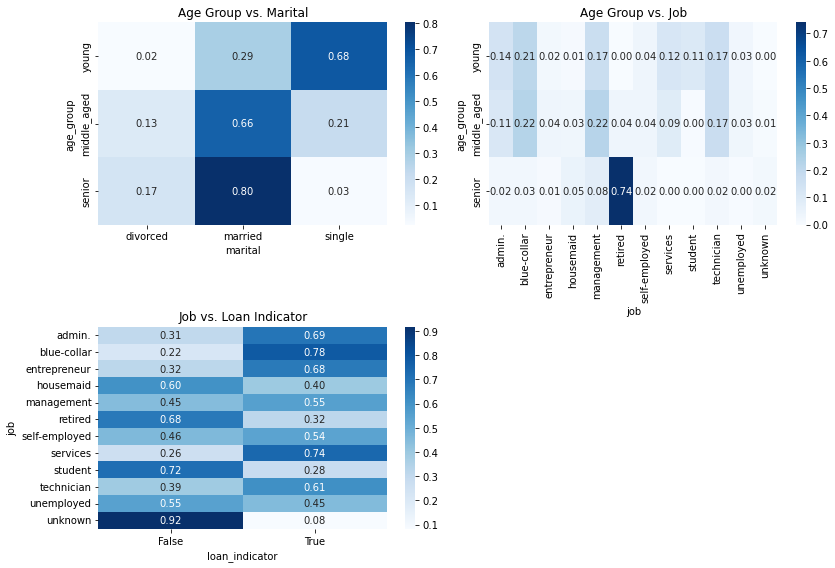

In [25]:
# Create cross-tabulations

cross_tab_age_marital = pd.crosstab(df['age_group'], df['marital'], normalize='index')
cross_tab_age_job = pd.crosstab(df['age_group'], df['job'], normalize='index')
cross_tab_job_loan = pd.crosstab(df['job'], df['loan_indicator'], normalize='index')

# Visualize cross-tabulations

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.heatmap(cross_tab_age_marital, annot=True, cmap='Blues', fmt='.2f')

plt.title('Age Group vs. Marital')
plt.subplot(2, 2, 2)
sns.heatmap(cross_tab_age_job, annot=True, cmap='Blues', fmt='.2f')

plt.title('Age Group vs. Job')

plt.subplot(2, 2, 3)
sns.heatmap(cross_tab_job_loan, annot=True, cmap='Blues', fmt='.2f')
plt.title('Job vs. Loan Indicator')

plt.tight_layout()
plt.show()

In [28]:
df

,job,marital,education,default,contact,day,month,previous,poutcome,subscribed,age_group,balance_category,contact_duration_category,previously_contacted,loan_indicator,campaign_frequency
0,admin.,married,unknown,no,telephone,19,nov,0,unknown,no,middle_aged,high,short,0,False,low
1,unknown,married,secondary,no,cellular,20,jul,0,unknown,no,middle_aged,medium,short,0,False,low
2,services,married,secondary,no,cellular,18,jul,0,unknown,no,young,medium,medium,0,True,low
3,management,divorced,tertiary,no,cellular,22,jun,3,success,yes,middle_aged,high,long,1,False,low
4,technician,married,secondary,no,cellular,4,feb,0,unknown,no,middle_aged,medium,long,0,True,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,management,single,tertiary,no,cellular,12,may,0,unknown,no,young,low,short,0,True,low
31643,management,divorced,tertiary,no,cellular,5,jun,0,unknown,yes,middle_aged,medium,long,0,True,low
31644,management,single,tertiary,no,cellular,7,aug,0,unknown,no,middle_aged,medium,short,0,False,low
31645,technician,married,secondary,no,telephone,15,may,12,failure,no,middle_aged,medium,short,1,True,high


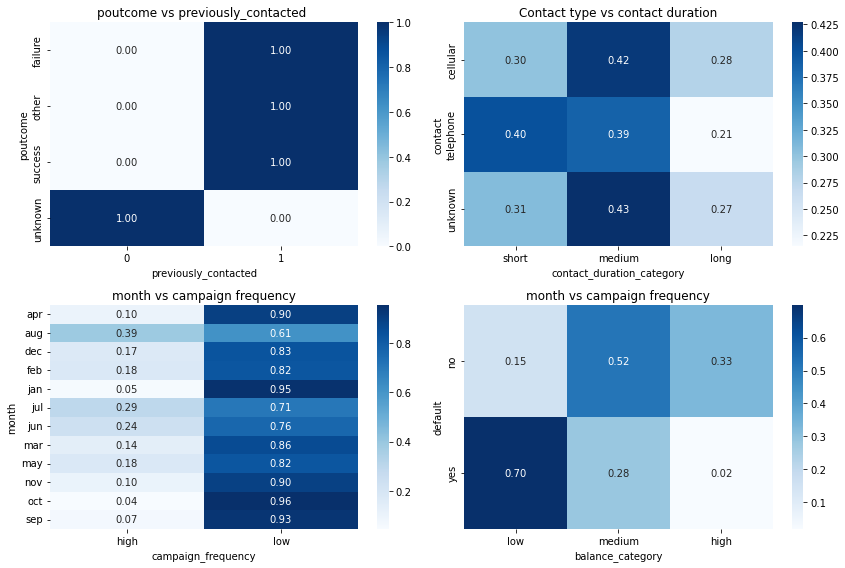

In [10]:
# Create cross-tabulations

cross_tab_previous = pd.crosstab(df['poutcome'], df['previously_contacted'], normalize='index')
cross_tab_contact = pd.crosstab(df['contact'], df['contact_duration_category'], normalize='index')
cross_tab_campaign = pd.crosstab(df['month'], df['campaign_frequency'], normalize='index')
cross_tab_balance = pd.crosstab(df['default'], df['balance_category'], normalize='index')

# Visualize cross-tabulations

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.heatmap(cross_tab_previous, annot=True, cmap='Blues', fmt='.2f')

plt.title('poutcome vs previously_contacted ')
plt.subplot(2, 2, 2)
sns.heatmap(cross_tab_contact, annot=True, cmap='Blues', fmt='.2f')

plt.title('Contact type vs contact duration')

plt.subplot(2, 2, 3)
sns.heatmap(cross_tab_campaign, annot=True, cmap='Blues', fmt='.2f')
plt.title('month vs campaign frequency')

plt.subplot(2, 2, 4)
sns.heatmap(cross_tab_balance, annot=True, cmap='Blues', fmt='.2f')
plt.title('month vs campaign frequency')

plt.tight_layout()
plt.show()

In [11]:
cross_tab_contact

contact_duration_category,short,medium,long
contact,,,
cellular,0.301278,0.418695,0.280027
telephone,0.399609,0.385931,0.214460
unknown,0.307726,0.426937,0.265337


In [31]:
cross_tab_balance = pd.crosstab(df['default'], df['balance_category'], normalize='index')
cross_tab_balance

balance_category,low,medium,high
default,,,
no,0.152147,0.518125,0.329728
yes,0.699145,0.282051,0.018803


In [25]:
cross_tab_age_marital = pd.crosstab(index =df['age_group'], columns=[df['marital'],df['loan_indicator']], margins=True,normalize='index')

cross_tab_age_marital

# cross_tab_3way = pd.crosstab(index=df['variable1'], 

# columns=[df['variable2'], df['variable3']], margins=True)

marital         divorced             married              single          
loan_indicator     False      True     False      True     False      True
age_group                                                                 
young           0.004070  0.020147  0.057794  0.233618  0.291412  0.392959
middle_aged     0.044465  0.085726  0.240466  0.415702  0.081635  0.132006
senior          0.150303  0.016970  0.741818  0.061818  0.029091  0.000000
All             0.040952  0.073751  0.225171  0.378203  0.112838  0.169084

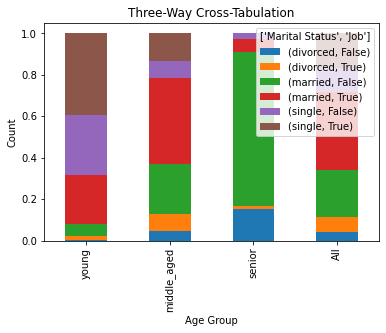

In [26]:
ax = cross_tab_age_marital.plot(kind='bar', stacked=True)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Three-Way Cross-Tabulation')
plt.legend(title=['Marital Status', 'Job'], loc='upper right')
plt.show()

# Different age groups show varying distributions of marital status and loan indicators.

# For example, in the "young" age group, a higher percentage of individuals with loan indicators are "single" (23.36%), while in the "senior" age group, a significant percentage are "married" (74.18%).

# Marital status and loan indicators seem to interact differently within different age groups.


## The majority of young individuals are single.

## The middle-aged group has a higher percentage of married individuals compared to other groups.

## Seniors are predominantly married, with a small percentage being divorced.



In [ ]:
# 7. Combine features. 

In [12]:
# 1. Age Group + Marital : 

#from sklearn.preprocessing import LabelEncoder

# Load your dataset
# df = ...

# Create cross-tabulations
cross_tab_age_marital = pd.crosstab(df['age_group'], df['marital'])

# Create a new feature based on cross-tabulations
df['age_group_marital'] = df.apply(lambda row: f"{row['age_group']}_{row['marital']}", axis=1)
#df = df.drop(columns=['age_group','marital'])

In [13]:
# 2. Job + Loan 
# Create cross-tabulations
#cross_tab_age_marital = pd.crosstab(df['job'], df['loan_indicator'])

# Create a new feature based on cross-tabulations
df['job_loan'] = df.apply(lambda row: f"{row['job']}_{row['loan_indicator']}", axis=1)
#df = df.drop(columns=['job','loan_indicator'])


# Previous Outcome + Previous Contacts:
Combine the outcome of the previous campaign (poutcome) with the number of previous contacts (previous). This can provide a more holistic view of historical engagement.

In [14]:
df['previously_contact_history'] = df.apply(lambda row: f"{row['poutcome']}_{row['previously_contacted']}", axis=1)
#df = df.drop(columns=['previously_contacted','poutcome'])
df

,job,marital,education,default,contact,day,month,previous,poutcome,subscribed,age_group,balance_category,contact_duration_category,previously_contacted,loan_indicator,campaign_frequency,age_group_marital,job_loan,previously_contact_history
0,admin.,married,unknown,no,telephone,19,nov,0,unknown,no,middle_aged,high,short,0,False,low,middle_aged_married,admin._False,unknown_0
1,unknown,married,secondary,no,cellular,20,jul,0,unknown,no,middle_aged,medium,short,0,False,low,middle_aged_married,unknown_False,unknown_0
2,services,married,secondary,no,cellular,18,jul,0,unknown,no,young,medium,medium,0,True,low,young_married,services_True,unknown_0
3,management,divorced,tertiary,no,cellular,22,jun,3,success,yes,middle_aged,high,long,1,False,low,middle_aged_divorced,management_False,success_1
4,technician,married,secondary,no,cellular,4,feb,0,unknown,no,middle_aged,medium,long,0,True,low,middle_aged_married,technician_True,unknown_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,management,single,tertiary,no,cellular,12,may,0,unknown,no,young,low,short,0,True,low,young_single,management_True,unknown_0
31643,management,divorced,tertiary,no,cellular,5,jun,0,unknown,yes,middle_aged,medium,long,0,True,low,middle_aged_divorced,management_True,unknown_0
31644,management,single,tertiary,no,cellular,7,aug,0,unknown,no,middle_aged,medium,short,0,False,low,middle_aged_single,management_False,unknown_0
31645,technician,married,secondary,no,telephone,15,may,12,failure,no,middle_aged,medium,short,1,True,high,middle_aged_married,technician_True,failure_1


# Contact Type + Contact Duration:
Combine the contact type and contact duration into a single feature. This can help capture whether certain types of contacts tend to have longer or shorter durations.

In [15]:
df['contact_duration'] = df.apply(lambda row: f"{row['contact']}_{row['contact_duration_category']}", axis=1)
#df = df.drop(columns=['contact','contact_duration_category'])


In [24]:
# COmbining mOnth and day 

df['day_month_interaction'] = df['day_category'].astype(str) + '_' + df['month']


# Month + Campaign Frequency:
Combine the contact month and campaign frequency into a single feature. This might provide insights into how often individuals are contacted during specific months.

In [25]:
df['campaign'] = df.apply(lambda row: f"{row['day_month_interaction']}_{row['campaign_frequency']}", axis=1)
#df = df.drop(columns=['campaign_frequency','month'])


# Default + Balance_category:
Creating a combined column for marital status and education might reveal whether certain educational levels are more common among married, single, or divorced individuals.

In [17]:
df['balance'] = df.apply(lambda row: f"{row['default']}_{row['balance_category']}", axis=1)
#df = df.drop(columns=['default','balance_category'])


In [27]:
df.columns

Index(['job', 'marital', 'education', 'default', 'contact', 'month',
       'previous', 'poutcome', 'subscribed', 'age_group', 'balance_category',
       'contact_duration_category', 'previously_contacted', 'loan_indicator',
       'campaign_frequency', 'age_group_marital', 'job_loan',
       'previously_contact_history', 'contact_duration', 'balance',
       'day_category', 'day_month_interaction', 'campaign'],
      dtype='object')

In [28]:
df['job_edu_history'] = df.apply(lambda row: f"{row['education']}_{row['job_loan']}", axis=1)
#df = df.drop(columns=['education','job_loan'])
df

,job,marital,education,default,contact,month,previous,poutcome,subscribed,age_group,...,campaign_frequency,age_group_marital,job_loan,previously_contact_history,contact_duration,balance,day_category,day_month_interaction,campaign,job_edu_history
0,admin.,married,unknown,no,telephone,nov,0,unknown,no,middle_aged,...,low,middle_aged_married,admin._False,unknown_0,telephone_short,no_high,mid,mid_nov,mid_nov_low,unknown_admin._False
1,unknown,married,secondary,no,cellular,jul,0,unknown,no,middle_aged,...,low,middle_aged_married,unknown_False,unknown_0,cellular_short,no_medium,mid,mid_jul,mid_jul_low,secondary_unknown_False
2,services,married,secondary,no,cellular,jul,0,unknown,no,young,...,low,young_married,services_True,unknown_0,cellular_medium,no_medium,mid,mid_jul,mid_jul_low,secondary_services_True
3,management,divorced,tertiary,no,cellular,jun,3,success,yes,middle_aged,...,low,middle_aged_divorced,management_False,success_1,cellular_long,no_high,late,late_jun,late_jun_low,tertiary_management_False
4,technician,married,secondary,no,cellular,feb,0,unknown,no,middle_aged,...,low,middle_aged_married,technician_True,unknown_0,cellular_long,no_medium,early,early_feb,early_feb_low,secondary_technician_True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,management,single,tertiary,no,cellular,may,0,unknown,no,young,...,low,young_single,management_True,unknown_0,cellular_short,no_low,mid,mid_may,mid_may_low,tertiary_management_True
31643,management,divorced,tertiary,no,cellular,jun,0,unknown,yes,middle_aged,...,low,middle_aged_divorced,management_True,unknown_0,cellular_long,no_medium,early,early_jun,early_jun_low,tertiary_management_True
31644,management,single,tertiary,no,cellular,aug,0,unknown,no,middle_aged,...,low,middle_aged_single,management_False,unknown_0,cellular_short,no_medium,early,early_aug,early_aug_low,tertiary_management_False
31645,technician,married,secondary,no,telephone,may,12,failure,no,middle_aged,...,high,middle_aged_married,technician_True,failure_1,telephone_short,no_medium,mid,mid_may,mid_may_high,secondary_technician_True


In [29]:
df['previos_contact_history'] = df.apply(lambda row: f"{row['previously_contact_history']}_{row['previous']}", axis=1)

In [30]:
df= df.drop(columns=['job','marital','education','default','contact','month','previous','poutcome',
                     'age_group','balance_category','contact_duration_category','previously_contacted',
                    'loan_indicator','campaign_frequency','previously_contact_history','day_category',
                    'day_month_interaction'])
df

,subscribed,age_group_marital,job_loan,contact_duration,balance,campaign,job_edu_history,previos_contact_history
0,no,middle_aged_married,admin._False,telephone_short,no_high,mid_nov_low,unknown_admin._False,unknown_0_0
1,no,middle_aged_married,unknown_False,cellular_short,no_medium,mid_jul_low,secondary_unknown_False,unknown_0_0
2,no,young_married,services_True,cellular_medium,no_medium,mid_jul_low,secondary_services_True,unknown_0_0
3,yes,middle_aged_divorced,management_False,cellular_long,no_high,late_jun_low,tertiary_management_False,success_1_3
4,no,middle_aged_married,technician_True,cellular_long,no_medium,early_feb_low,secondary_technician_True,unknown_0_0
...,...,...,...,...,...,...,...,...
31642,no,young_single,management_True,cellular_short,no_low,mid_may_low,tertiary_management_True,unknown_0_0
31643,yes,middle_aged_divorced,management_True,cellular_long,no_medium,early_jun_low,tertiary_management_True,unknown_0_0
31644,no,middle_aged_single,management_False,cellular_short,no_medium,early_aug_low,tertiary_management_False,unknown_0_0
31645,no,middle_aged_married,technician_True,telephone_short,no_medium,mid_may_high,secondary_technician_True,failure_1_12


# 7. Apply Label encoder. 

In [31]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the DataFrame to avoid modifying the original


# Iterate through categorical columns and apply label encoding
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

# Print the encoded DataFrame

In [76]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the DataFrame to avoid modifying the original

# Iterate through categorical columns and apply label encoding
for column in train.columns:
    le = LabelEncoder()
    train[column] = le.fit_transform(train[column])
    
# Print the encoded DataFrame

In [77]:
for column in test.columns:
    le = LabelEncoder()
    test[column] = le.fit_transform(test[column])
    

In [47]:
train

,age,job,marital,education,default,balance,housing,loan,contact,day,...,pdays,previous,poutcome,subscribed,age_group,balance_category,contact_duration_category,previously_contacted,loan_indicator,campaign_frequency
0,38,0,1,3,0,2719,0,0,1,18,...,0,0,3,0,0,0,2,0,0,1
1,13,11,1,1,0,822,0,0,0,19,...,0,0,3,0,0,2,2,0,0,1
2,9,7,1,1,0,1709,1,0,0,17,...,0,0,3,0,2,2,1,0,1,1
3,39,4,0,2,0,3815,0,0,0,21,...,79,3,2,1,0,0,0,1,0,1
4,13,9,1,1,0,938,1,0,0,3,...,0,0,3,0,0,2,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,11,4,2,2,0,819,1,0,0,11,...,0,0,3,0,2,1,2,0,1,1
31643,35,4,0,2,0,1199,0,1,0,4,...,0,0,3,1,0,2,0,0,1,1
31644,14,4,2,2,0,1131,0,0,0,6,...,0,0,3,0,0,2,2,0,0,1
31645,39,9,1,1,0,1044,1,0,1,14,...,332,12,0,0,0,2,2,1,1,0


In [32]:
from sklearn.ensemble import IsolationForest

# Create an Isolation Forest model
isolation_forest = IsolationForest(contamination=0.01)

# Fit the model and predict outliers
outliers = isolation_forest.fit_predict(df)

outlier_indices = [i for i, pred in enumerate(outliers) if pred == -1]

df.iloc[outlier_indices]

,subscribed,age_group_marital,job_loan,contact_duration,balance,campaign,job_edu_history,previos_contact_history
90,1,2,12,4,0,3,60,11
125,1,8,8,2,2,7,56,11
159,1,2,20,0,2,68,68,0
483,1,8,16,0,2,5,40,25
597,1,2,19,6,0,16,91,79
...,...,...,...,...,...,...,...,...
31405,1,8,16,4,2,14,64,31
31465,1,8,19,1,2,14,43,11
31470,1,3,6,0,0,33,6,25
31518,1,8,16,1,2,0,88,79


In [33]:
# Get indices of non-outliers
non_outlier_indices = [i for i, pred in enumerate(outliers) if pred == 1]


# Filter the DataFrame to keep only non-outliers
df = df.iloc[non_outlier_indices]

In [34]:
df

,subscribed,age_group_marital,job_loan,contact_duration,balance,campaign,job_edu_history,previos_contact_history
0,0,1,0,5,0,66,72,79
1,0,1,22,2,2,58,46,79
2,0,7,15,1,2,58,39,79
3,1,0,8,0,0,36,56,72
4,0,1,19,0,2,7,43,79
...,...,...,...,...,...,...,...,...
31642,0,8,9,2,1,64,57,79
31643,1,0,9,0,2,12,57,79
31644,0,2,8,2,2,3,56,79
31645,0,1,19,5,2,63,43,3


In [35]:
df.corr()

,subscribed,age_group_marital,job_loan,contact_duration,balance,campaign,job_edu_history,previos_contact_history
subscribed,1.000000,0.071204,0.023383,-0.224841,-0.051565,-0.019985,0.064115,0.000707
age_group_marital,0.071204,1.000000,0.051171,-0.047083,0.051620,-0.027089,0.061662,0.021955
job_loan,0.023383,0.051171,1.000000,-0.062545,-0.012305,-0.042336,0.468023,0.008958
contact_duration,-0.224841,-0.047083,-0.062545,1.000000,0.026267,0.055477,-0.115799,0.238066
balance,-0.051565,0.051620,-0.012305,0.026267,1.000000,-0.054473,-0.047710,0.025817
campaign,-0.019985,-0.027089,-0.042336,0.055477,-0.054473,1.000000,-0.048091,-0.044015
job_edu_history,0.064115,0.061662,0.468023,-0.115799,-0.047710,-0.048091,1.000000,-0.005134
previos_contact_history,0.000707,0.021955,0.008958,0.238066,0.025817,-0.044015,-0.005134,1.000000


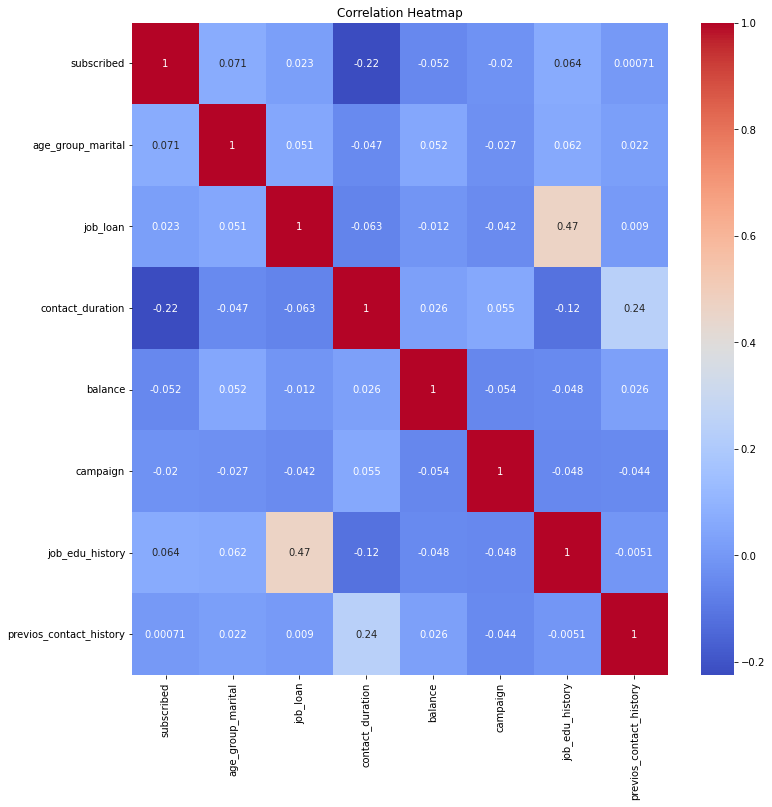

In [36]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
## After seeing the co linearly betwen Previously_con

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select the columns you want to calculate VIF for (excluding non-grade columns if needed)

columns_for_vif = [col for col in df.columns]

# Calculate VIF for the selected columns

vif_data = df[columns_for_vif]
vif = pd.DataFrame()
vif["Feature"] = vif_data.columns
vif["VIF"] = [variance_inflation_factor(vif_data.values, i) for i in range(len(vif_data.columns))]
print(vif)

                   Feature       VIF
0               subscribed  1.188175
1        age_group_marital  1.771487
2                 job_loan  3.845421
3         contact_duration  2.389711
4                  balance  2.431049
5                 campaign  3.381098
6          job_edu_history  5.479062
7  previos_contact_history  7.295689


In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select the columns you want to calculate VIF for (excluding non-grade columns if needed)

columns_for_vif = [col for col in train.columns]

# Calculate VIF for the selected columns

vif_data = train[columns_for_vif]
vif = pd.DataFrame()
vif["Feature"] = vif_data.columns
vif["VIF"] = [variance_inflation_factor(vif_data.values, i) for i in range(len(vif_data.columns))]
print(vif)

       Feature        VIF
0          age   5.936743
1          job   2.824102
2      marital   5.004745
3    education   3.751749
4      default   1.038180
5      balance   2.944616
6      housing   2.644959
7         loan   1.217557
8      contact   2.019059
9          day   4.141526
10       month   5.273774
11    duration   2.583925
12    campaign   1.401455
13       pdays   2.943860
14    previous   1.659366
15    poutcome  15.305229
16  subscribed   1.452956


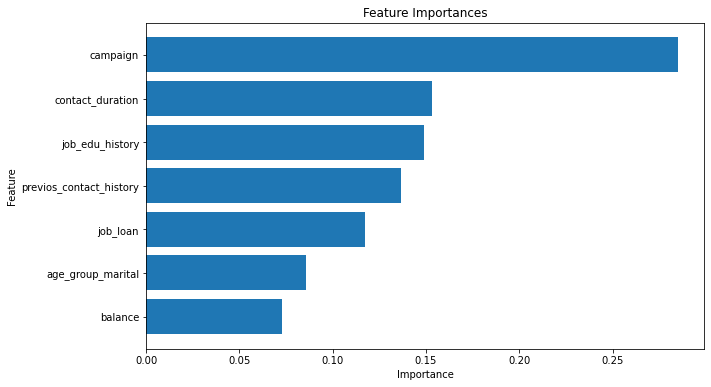

In [39]:
from sklearn.ensemble import RandomForestRegressor

# Initialize a Random Forest Regressor model
model = RandomForestRegressor()
X = df.drop(columns=['subscribed'])

y = df['subscribed']

# Fit the model to your data
model.fit(X, y)

# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Create a DataFrame to hold feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Plot feature importances
plt.figure(figsize=(10, 6))

plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])

plt.xlabel('Importance')

plt.ylabel('Feature')

plt.title('Feature Importances')

plt.show()

## Data Modeling Method 1 : 

## Applying PCA to the data and model the data. 

In [96]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_train = train.drop(columns=['poutcome','day','month','subscribed'])
X_test = test.drop(columns=['poutcome','day','month'])
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [84]:
test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,14,7,1,1,0,682,1,0,0,14,8,19,5,0,0,3
1,60,5,0,0,0,2809,0,0,1,0,5,371,0,0,0,3
2,13,6,2,2,0,708,1,0,2,15,8,673,0,0,0,3
3,39,7,2,0,0,3226,1,0,1,12,8,64,1,0,0,3
4,27,1,0,1,0,94,0,1,2,2,5,110,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,21,4,1,2,0,609,0,0,0,27,1,147,3,0,0,3
13560,36,1,1,0,0,2535,1,0,2,19,6,157,0,0,0,3
13561,17,5,1,0,0,849,1,0,0,28,4,135,0,0,0,3
13562,11,0,2,1,0,1028,0,0,0,8,9,207,1,62,3,2


In [98]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have preprocessed data (X) and corresponding target labels (y)
y = train['subscribed']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_pca, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_classifier.predict(X_test)

test_pred = rf_classifier.predict(X_test_pca)
test_pred = test_pred.flatten()

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

classification_report_output = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report_output)

test_pred

Accuracy: 0.8951026856240126
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      5599
           1       0.58      0.32      0.41       731

    accuracy                           0.90      6330
   macro avg       0.75      0.65      0.68      6330
weighted avg       0.88      0.90      0.88      6330



array([0, 1, 0, ..., 0, 1, 0])

Accuracy: 0.8951026856240126
Precision: 0.5835411471321695
Recall: 0.320109439124487
F1-Score: 0.4134275618374558
ROC AUC: 0.6451413421734241


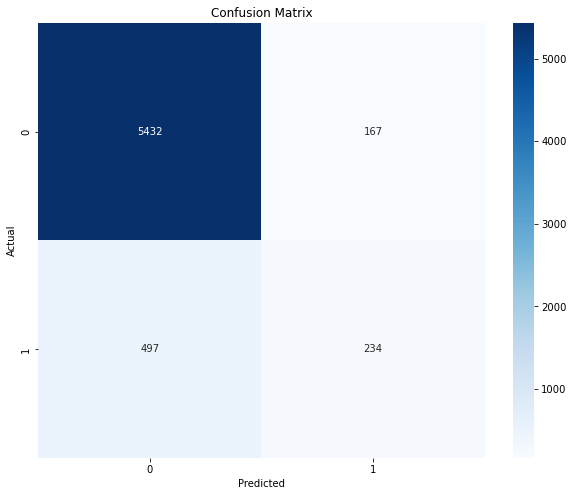

In [100]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix, classification_report
# Calculate precision, recall, and F1-score

precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC AUC:", roc_auc)
#print("Confusion Matrix:\n", conf_matrix)
#print("Classification Report:\n", class_rep)


# Create a confusion matrix
cm = confusion_matrix(y_test,y_pred)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=np.unique(y_test), yticklabels=np.unique(y_pred))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
## This is giving 89% accuracy. 

## Data Modeling Method 2 : 
Creating new columns and then modeling data; 

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X = df.drop(columns='subscribed')
y = df['subscribed']

# Assuming you have preprocessed data (X) and corresponding target labels (y)
#y = train['subscribed']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

classification_report_output = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report_output)


Accuracy: 0.8970635173954676
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      5592
           1       0.53      0.34      0.41       674

    accuracy                           0.90      6266
   macro avg       0.73      0.65      0.68      6266
weighted avg       0.88      0.90      0.89      6266



In [ ]:
## This too is giving 89% accuracy. 